In [2]:
##code for resizing the image
from PIL import Image

# Function to resize an image from a local path
def resize_image(image_path, size=(256, 256)):
    img = Image.open(image_path)
    img = img.resize(size)
    return img

# Local paths of the images
image_path_1 = "test/DigX_01072008_170101/images/DigX_01072008_170101.png"  # Replace with your actual image path

# Resize the images
resized_image_1 = resize_image(image_path_1)


# Save the resized images
resized_image_1.save("resized_image_2.png")


print("Images have been resized and saved.")


Images have been resized and saved.


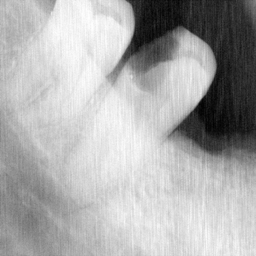

In [3]:
resized_image_1

/var/folders/vv/w5ppjsvn6l9_1h1g00hwh6km0000gn/T/ipykernel_1060/2498576200.py:27: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(resized_file_path, resized_img)


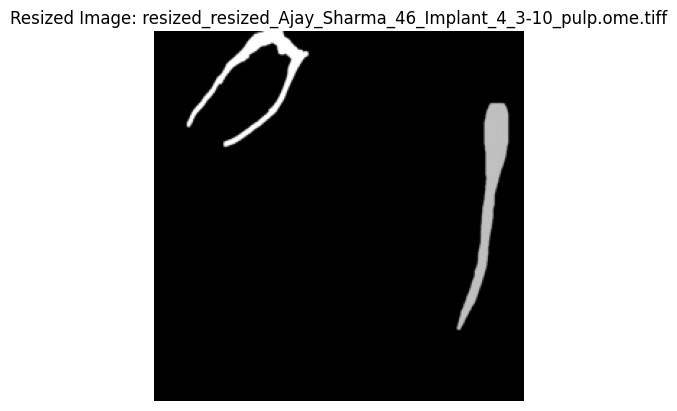

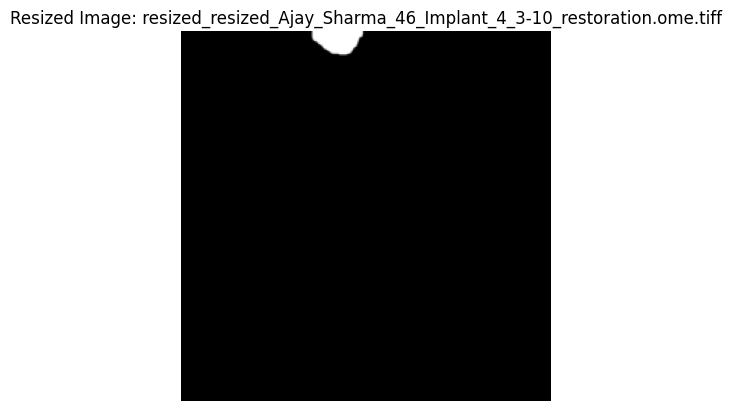

All images have been resized and saved.


In [6]:
##code for resizing the tiff file and displaying the tiff files

import tifffile as tiff
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt

# Define file paths for your TIFF images
file_paths = [
    "train/Ajay_Sharma_46_Implant_4.3_10/masks/resized_Ajay_Sharma_46_Implant_4_3-10_pulp.ome.tiff",
    "train/Ajay_Sharma_46_Implant_4.3_10/masks/resized_Ajay_Sharma_46_Implant_4_3-10_restoration.ome.tiff"
]

# Loop through the file paths, read, resize, and save each image
for file_path in file_paths:
    # Read the TIFF image
    tiff_img = tiff.imread(file_path)
    
    # Resize the image
    resized_img = resize(tiff_img, (256, 256), anti_aliasing=True)
    

    # Create a filename for the resized image
    resized_file_path = f"resized_{file_path.split('/')[-1]}"
    
    # Save the resized image
    tiff.imsave(resized_file_path, resized_img)

    # Display the resized image
    plt.imshow(resized_img, cmap='gray')  # Show resized image
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f'Resized Image: {resized_file_path}')  # Add a title
    plt.show()

print("All images have been resized and saved.")


In [5]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

TRAIN_PATH = 'train/'
TEST_PATH = 'test/'
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(4, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 256, 256,  │          0 │ input_layer_3[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 256, 256,  │        448 │ lambda_3[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 256, 256,  │          0 │ conv2d_57[0][0]   │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 256, 256,  │      2,320 │ dropout_27[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 128, 128,  │      4,640 │ max_pooling2d_12… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 128, 128,  │          0 │ conv2d_59[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 128, 128,  │      9,248 │ dropout_28[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 64, 64,    │          0 │ conv2d_61[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 64, 64,    │     36,928 │ dropout_29[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 32, 32,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_14… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 32, 32,    │          0 │ conv2d_63[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │    147,584 │ dropout_30[0][0]

 Total params: 1,941,156 (7.40 MB)

 Trainable params: 1,941,156 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

In [11]:
import os
from skimage.io import imread
from skimage.transform import resize
from tqdm import tqdm
import numpy as np

# Constants for image dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

# Paths to training and testing datasets
TRAIN_PATH = 'train/'
TEST_PATH = 'test/'

# Get the IDs of the training and testing images
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

# Initialize arrays to hold training images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = os.path.join(TRAIN_PATH, id_)
    
    # Look for both .png and .jpg files
    img_path_png = os.path.join(path, 'images', f'{id_}.png')
    img_path_jpg = os.path.join(path, 'images', f'{id_}.jpg')
    
    # Check if the .png image exists first, then check for .jpg
    if os.path.exists(img_path_png):
        img = imread(img_path_png)
    elif os.path.exists(img_path_jpg):
        img = imread(img_path_jpg)
    else:
        raise FileNotFoundError(f"Image not found for ID {id_}")
    
    # Handle different image dimensions (grayscale, etc.)
    if img.ndim == 2:  # Grayscale image
        img = np.expand_dims(img, axis=-1)  # Add channel dimension
    elif img.ndim > 3:  # More than 3 dimensions (unexpected)
        img = img[:, :, :IMG_CHANNELS]  # Use only the first 3 channels

    # Resize and store image
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

    # Load and combine masks
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(os.path.join(path, 'masks')))[2]:
        mask_ = imread(os.path.join(path, 'masks', mask_file))
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Handle test images similarly
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []

print('Resizing test images')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = os.path.join(TEST_PATH, id_)
    
    img_path_png = os.path.join(path, 'images', f'{id_}.png')
    img_path_jpg = os.path.join(path, 'images', f'{id_}.jpg')
    
    if os.path.exists(img_path_png):
        img = imread(img_path_png)
    elif os.path.exists(img_path_jpg):
        img = imread(img_path_jpg)
    else:
        raise FileNotFoundError(f"Image not found for ID {id_}")

    # Adjust for grayscale and other formats
    if img.ndim == 2:
        img = np.expand_dims(img, axis=-1)
    elif img.ndim > 3:
        img = img[:, :, :IMG_CHANNELS]
    
    sizes_test.append([img.shape[0], img.shape[1]])  # Store original size
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')


Resizing training images and masks


100%|██████████| 20/20 [00:02<00:00,  9.08it/s]


Resizing test images


100%|██████████| 3/3 [00:00<00:00, 168.68it/s]

Done!


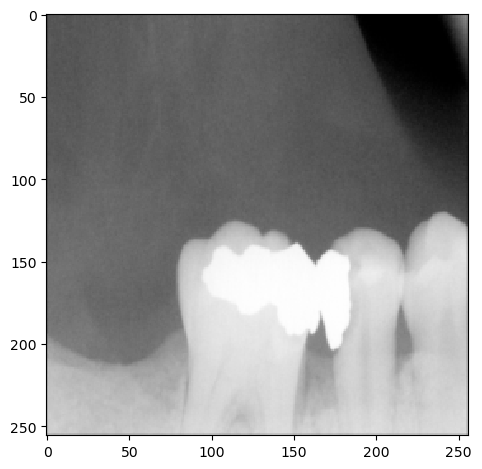

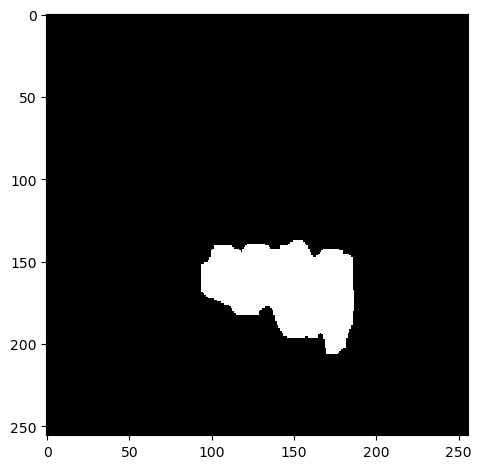

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_8 (Lambda)   │ (None, 256, 256,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_152 (Conv2D) │ (None, 256, 256,  │        448 │ lambda_8[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_72          │ (None, 256, 256,  │          0 │ conv2d_152[0][0]  │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_153 (Conv2D) │ (None, 256, 256,  │      2,320 │ dropout_72[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 128, 128,  │          0 │ conv2d_153[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_154 (Conv2D) │ (None, 128, 128,  │      4,640 │ max_pooling2d_32… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_73          │ (None, 128, 128,  │          0 │ conv2d_154[0][0]  │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_155 (Conv2D) │ (None, 128, 128,  │      9,248 │ dropout_73[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 64, 64,    │          0 │ conv2d_155[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_156 (Conv2D) │ (None, 64, 64,    │     18,496 │ max_pooling2d_33… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_74          │ (None, 64, 64,    │          0 │ conv2d_156[0][0]  │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_157 (Conv2D) │ (None, 64, 64,    │     36,928 │ dropout_74[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_34    │ (None, 32, 32,    │          0 │ conv2d_157[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_158 (Conv2D) │ (None, 32, 32,    │     73,856 │ max_pooling2d_34… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_75          │ (None, 32, 32,    │          0 │ conv2d_158[0][0]  │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_159 (Conv2D) │ (None, 32, 32,    │    147,584 │ dropout_75[0][0]

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.5679 - loss: 0.6882 - val_accuracy: 0.7904 - val_loss: 0.6102
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.8341 - loss: 0.5339 - val_accuracy: 0.8817 - val_loss: 0.5767
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 0.8803 - loss: 0.5222 - val_accuracy: 0.8842 - val_loss: 0.5120
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.8906 - loss: 0.4623 - val_accuracy: 0.8855 - val_loss: 0.4434
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.8923 - loss: 0.5588 - val_accuracy: 0.8855 - val_loss: 0.4604
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.8920 - loss: 0.4547 - val_accuracy: 0.8855 - val_loss: 0.4639
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.8923 - loss: 0.4513 - val_accuracy: 0.8855 - val_loss: 0.4616
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.8914 - loss: 0.4503 - val_accuracy: 0.8855 - val_loss:

In [29]:
# import tensorflow as tf
# import os
# import random
# import numpy as np
# from tqdm import tqdm
# from skimage.io import imread, imshow
# from skimage.transform import resize
# import matplotlib.pyplot as plt



# # Constants for image dimensions
# IMG_WIDTH = 256
# IMG_HEIGHT = 256
# IMG_CHANNELS = 3

# # Paths to training and testing datasets
# TRAIN_PATH = 'train/'
# TEST_PATH = 'test/'

# # Get the IDs of the training and testing images
# train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids = next(os.walk(TEST_PATH))[1]

# # Initialize arrays to hold training images and masks
# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Using built-in bool

# print('Resizing training images and masks')
# # Load and resize training images and masks
# # Load and resize training images and masks
# for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
#     path = os.path.join(TRAIN_PATH, id_)
#     img = imread(os.path.join(path, 'images', f'{id_}.jpg'))

#     # Adjust handling for grayscale images
#     if img.ndim == 2:  # Grayscale image
#         img = np.expand_dims(img, axis=-1)  # Add a channel dimension
#     elif img.ndim > 3:  # More than 3 dimensions (unexpected)
#         img = img[:, :, :IMG_CHANNELS]  # Use only the first few channels

#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_train[n] = img  # Fill X_train with the resized image
    
#     mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)  # Update the dtype if necessary
#     for mask_file in next(os.walk(os.path.join(path, 'masks')))[2]:
#         mask_ = imread(os.path.join(path, 'masks', mask_file))
#         mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
#         mask = np.maximum(mask, mask_)  # Combine masks
#     Y_train[n] = mask  # Fill Y_train with the mask

# # Initialize arrays to hold test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []

# print('Resizing test images')
# # Load and resize test images
# # Load and resize test images
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = os.path.join(TEST_PATH, id_)
#     img = imread(os.path.join(path, 'images', f'{id_}.png'))
    

#     # Check the number of dimensions and adjust accordingly
#     if img.ndim == 2:  # Grayscale image
#         img = np.expand_dims(img, axis=-1)  # Add a channel dimension
#     elif img.ndim > 3:  # More than 3 dimensions (unexpected)
#         img = img[:, :, :IMG_CHANNELS]  # Use only the first few channels

#     sizes_test.append([img.shape[0], img.shape[1]])  # Store original size
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img  # Fill X_test with the resized image

# print('Done!')

# Display a random training image and its corresponding mask
image_x = random.randint(0, len(train_ids) - 1)
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

# Build the U-Net model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

# Output layer
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
# One-hot encode the target masks if you need multi-class segmentation
# Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, num_classes=1)

# Create the model
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Fit the model
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


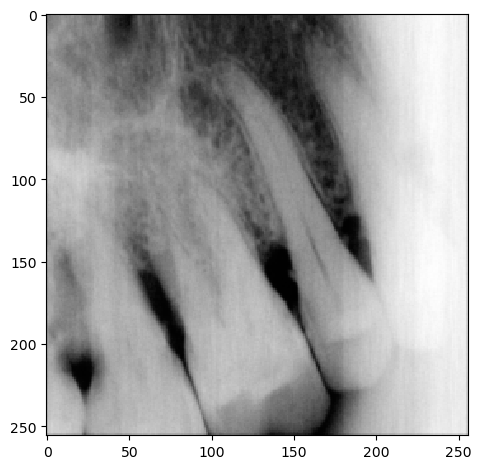

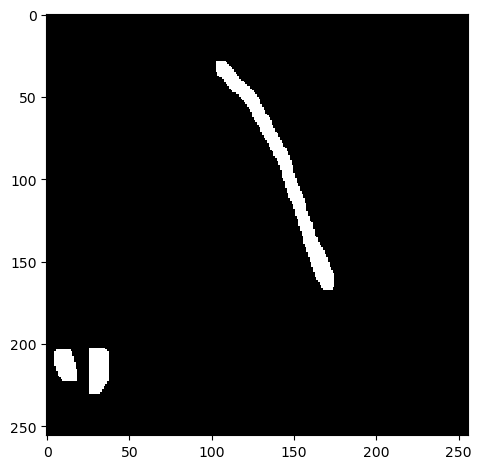

/Applications/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


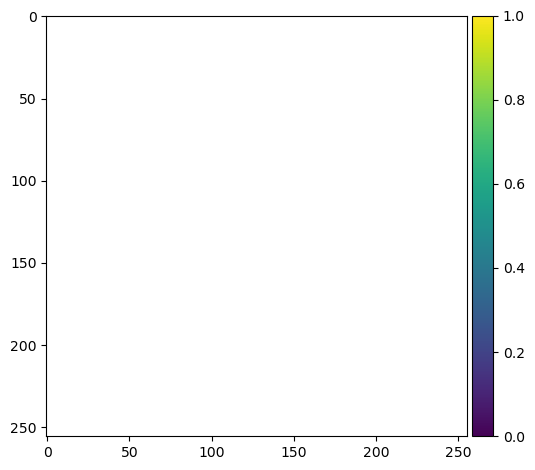

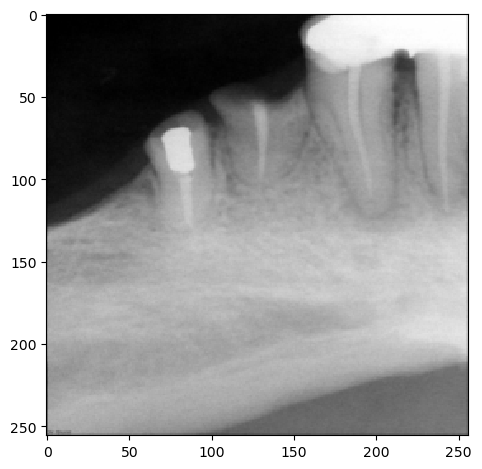

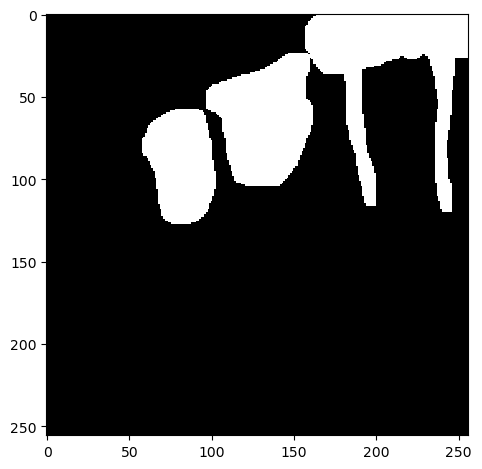

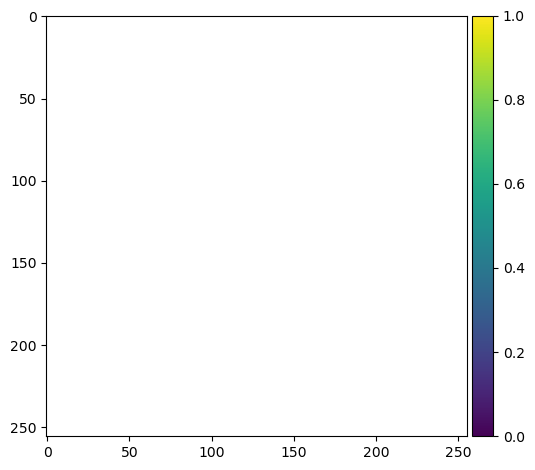

In [14]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [30]:
from tensorflow.keras.utils import img_to_array, load_img
image = load_img('train/DigX_01012009_120804/images/DigX_01012009_120804.jpg', target_size=(256, 256), color_mode='grayscale')
image = img_to_array(image) / 255.0
image = np.expand_dims(X_train[1], axis=0) 

In [31]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


In [45]:
pred = model.predict(image)[0]
pred = (pred > 0).astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [32]:
len(X_train[0])

256

In [33]:
predicted_mask = (prediction > 0.5).astype(np.uint8)
predicted_mask = np.squeeze(predicted_mask)

In [34]:
test_image = load_img('image labelling inprocess/DigX_01022009_144408.jpg', target_size=(256, 256), color_mode='grayscale')
test_image = img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

In [35]:
pred = model.predict(test_image)[0]
pred = (pred > 0).astype(np.uint8)

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv2d_152" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 256, 256, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 256, 256, 1), dtype=float32)
  • training=False
  • mask=None